In [221]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
json_file = open('demo.json', encoding="utf8")
data = json.load(json_file)

directory = os.fsencode("eduproject_data")
df_data_list = []
df_users_list = []
df_media_list = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".json"):
        json_file = open(os.path.join(directory.decode("utf-8"), str(filename)), encoding="utf8")
        data = json.load(json_file)
        df_data = pd.DataFrame(data['data'])
        df_users = pd.DataFrame(data['includes']['users'])
        df_media = pd.DataFrame(data['includes']['media'])
        df_data_list.append(df_data)
        df_users_list.append(df_users)
        df_media_list.append(df_media)
        
df_data_all = pd.concat(df_data_list, ignore_index=True)
df_users_all = pd.concat(df_users_list, ignore_index=True)
df_media_all = pd.concat(df_media_list, ignore_index=True)

df_all = pd.merge(df_data_all,df_users_all, left_on='author_id', right_on='id', how='left')

Text(0.5, 0, 'dates')

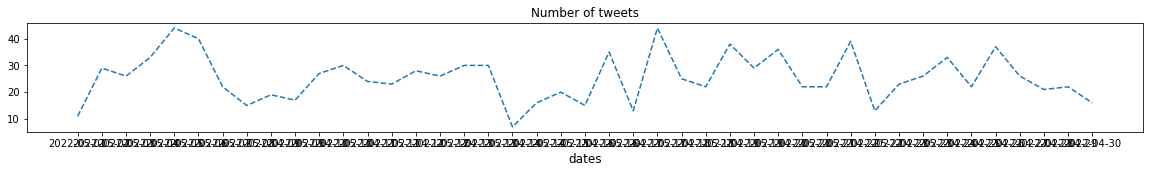

In [222]:
#Tweets per day (time series)
dates = [x.split('T')[0] for x in list(df_data_all.created_at)]
from collections import Counter
dates = dict(Counter(dates))
dates_x = dates.keys()
dates_y = dates.values()
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
plt.plot_date(dates_x, dates_y, '--')
plt.title('Number of tweets')
plt.xlabel('dates', fontsize = 12)

In [223]:
#Tweets per person ranking
#First we remove duplicates by id_x and conversation_id
df_all_no_duplicates = df_all.drop_duplicates(subset=["conversation_id","id_x"])
df_all_no_duplicates.value_counts(subset=['username', 'name']).head(30)

username         name                                              
llume38          Luis de Mena                                          133
srviruel         Sergio Ruiz Viruel                                     45
ladeidiomas      Jimena 🇪🇸🇬🇧🇩🇪🇫🇷🇮🇹🇧🇷🇷🇺 #TVTTagTeam 🦩                    40
edpuzzle_es      Edpuzzle (español)                                     28
abeorquin        Abe Orquín                                             26
agr_psp_iplacex  Agrupación Estudiantes Psicopedagogía Online           25
vicentgadea      Vicent Gadea                                           22
imgende          Ingrid Mosquera                                        21
rosaliarte       Rosa Liarte Alcaine                                    21
ProfeCarlos67    Carlos Espinoza R. #SoyProfesor - #claustrovirtual     20
manueljesusF     Manuel Jesús Fernández                                 19
123eraseunavez   Cuentitis Crónica                                      19
area44cp         Área 44 Servici

In [7]:
#Retweets per person ranking
# Get a list of users
# For each user, get the retweets and add to a variable
# Example: for user in df_all_no_duplicates
#               

In [ ]:
#Likes per person ranking

In [224]:
#Number and name of related hashtags
hashtags=df_all_no_duplicates["entities"].apply(lambda x: x.get('hashtags', None))
hashtags_df = pd.DataFrame.from_dict(hashtags)
hashtags_df = [[d.get("tag") for d in x] for x in hashtags_df["entities"]]
hashtags_all = sum(hashtags_df, [])
hashtag_count = pd.DataFrame(hashtags_all)
hashtag_count = hashtag_count.value_counts()
hashtag_count.head(30)

claustrovirtual       979
ClaustroVirtual       106
educacion              83
educación              60
docentes               47
mfltwitterati          37
edutwitter             35
psicopedagogia         34
edtech                 33
maestros               33
profesores             31
maestro                31
edchats                30
teacher5oclockclub     30
pedagogía              29
psicopedagogía         29
pedagogia              29
profesor               29
docente                29
teachers               26
ENSEnandoConTIC        26
edufis                 25
edurecetas             24
edpuzzle               23
ABJ                    22
unitedteachers         21
hashtags               21
inclusioneducativa     20
podcast                19
MicrosoftEDU           19
dtype: int64

In [225]:
#Most retweeted tweets

df_all_no_duplicates['retweet_count'] = df_all_no_duplicates['public_metrics'].apply(lambda x: x.get('retweet_count', None))
df_all_no_duplicates.value_counts(subset=['retweet_count', 'username']).sort_values(ascending=False).head(30)
# If I add text the formatting is terrible

#This is the first way I used to tackle the problem, but I didn't get to add extra columns to the ptweets dataframe
#ptweets = df_all_no_duplicates['public_metrics'].apply(lambda x: x.get('retweet_count', None))
#ptweets= pd.DataFrame(ptweets)
#ptweets
#ptweets_ordered = ptweets.sort_values(by="public_metrics", ascending=False)

retweet_count  username       
0              llume38            65
1              llume38            31
0              agr_psp_iplacex    25
               srviruel           23
2              llume38            20
0              imgende            17
1              ladeidiomas        15
0              ProfeCarlos67      15
               ladeidiomas        15
1              abeorquin          14
0              area44cp           14
               rosaliarte         11
               asunflowers        10
2              srviruel            9
               edpuzzle_es         9
0              123eraseunavez      8
3              llume38             7
0              miguealvm           7
1              Paulaticher         6
0              daltonicoprofe      5
2              ladeidiomas         5
1              GoldenmacEDU        5
0              Hiperdocumentos     5
5              edpuzzle_es         5
1              123eraseunavez      5
               srviruel            5
0      

In [226]:
#Most liked tweets
#TO-DO: How to add the text & username for each of the tweets displayed?
ptweets = df_all_no_duplicates['public_metrics'].apply(lambda x: x.get('like_count', None))
ptweets= pd.DataFrame(ptweets)
ptweets_ordered = ptweets.sort_values(by="public_metrics", ascending=False)
ptweets_ordered.head(30)

,public_metrics
9330,220
6624,192
3489,148
4393,145
4855,135
8178,123
3629,115
14118,114
11938,97
4815,97


In [227]:
#Tweets with most answers
#TO-DO: How to add the text & username for each of the tweets displayed?
ptweets = df_all_no_duplicates['public_metrics'].apply(lambda x: x.get('reply_count', None))
ptweets= pd.DataFrame(ptweets)
ptweets_ordered = ptweets.sort_values(by="public_metrics", ascending=False)
ptweets_ordered.head(30)

,public_metrics
8032,19
7493,17
1532,17
4393,15
14736,14
4909,13
11847,13
6803,12
10249,12
8046,12


In [ ]:
#List of URL's/websites mentioned in the tweets


In [248]:
import re
#https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)
#REGEX MUST BE FINETUNED
urls= df_all_no_duplicates["entities"].apply(lambda x: x.get('urls', None))
urls_df = pd.DataFrame(urls)
#urls_df = [[d.get("expanded_url") for d in x] for x in urls_df["entities"]]
urls_df = [[d.get("expanded_url") for d in x or []] for x in urls_df["entities"]]
urls_df
all_links = sum(urls_df, [])
all_links
all_links_formatted = []
#m = re.search('\/\/(www)?(.+?)\.(com|org|es)', text)
for link in all_links:
    formatted_link = re.findall("\/\/(www)?(.+?)\.(com|org|es|be)", link)
    all_links_formatted.append(formatted_link)
    
all_links_formatted

[[('', 'twitter', 'com')],
 [('', 'dedicatedteacher.cambridge', 'org')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('www', '.instagram', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'diadeinternet', 'org')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [],
 [('', 'twitter', 'com')],
 [('www', '.proyectogoodgame', 'com')],
 [('', 'youtu', 'be')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'dedicatedteacher.cambridge', 'org')],
 [('', 'twitter', 'com')],
 [('', 'twitter', 'com')],
 [('', 'twit

In [247]:
all_links

['https://twitter.com/jcantlord/status/1520835169137090563/photo/1',
 'https://dedicatedteacher.cambridge.org/entries/',
 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1',
 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1',
 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1',
 'https://www.instagram.com/p/CdAlTq-OAdp/',
 'https://twitter.com/123eraseunavez/status/1520695853765337089/photo/1',
 'https://twitter.com/rosaliarte/status/1520674661448794113/video/1',
 'https://view.genial.ly/61fa53b2f8b2540018415285',
 'https://twitter.com/genially_es/status/1520674634462543872/photo/1',
 'https://twitter.com/ProfeCarlos67/status/1520607723540606977/photo/1',
 'https://twitter.com/tonibernabeu123/status/1521229962283466752/photo/1',
 'https://twitter.com/toperaeditorial/status/1521221459309481986/photo/1',
 'http://diadeinternet.org/2021/share/28540/381/436',
 'https://twitter.com/MiriamMAjedrez/status/1521197219692658688/p

<AxesSubplot:>

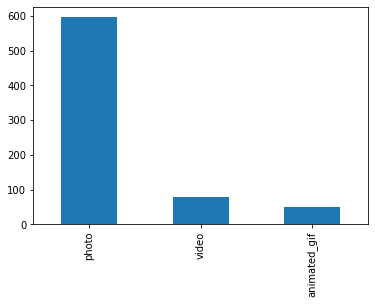

In [191]:
#Most used media
df_media_all["type"].value_counts().plot.bar()

In [131]:
df_all_no_duplicates

,entities,created_at,possibly_sensitive,author_id,id_x,conversation_id,reply_settings,public_metrics,attachments,source,lang,text,in_reply_to_user_id,referenced_tweets,context_annotations,geo,id_y,name,username
0,"{'mentions': [{'start': 200, 'end': 207, 'username': 'OpenAI', 'id': '4398626122'}], 'urls': [{'start': 272, 'end': 295, 'url': 'https://t.co/gpUCLSmEoy', 'expanded_url': 'https://twitter.com/jcantlord/status/1520835169137090563/photo/1', 'display_url': 'pic.twitter.com/gpUCLSmEoy'}], 'hashtags': [{'start': 163, 'end': 185, 'tag': 'inteligenciartificial'}, {'start': 191, 'end': 196, 'tag': 'GPT3'}, {'start': 243, 'end': 259, 'tag': 'claustrovirtual'}, {'start': 260, 'end': 271, 'tag': 'ai4schools'}]}",2022-05-01T18:38:54.000Z,False,2232144372,1520835169137090563,1520835169137090563,everyone,"{'retweet_count': 2, 'reply_count': 0, 'like_count': 6, 'quote_count': 0}",{'media_keys': ['3_1520834808284332033']},Twitter Web App,es,"¿Quieres incluir preguntas abiertas en tus clases para trabajar el pensamiento activo, pero no tienes imaginación? ¿Por qué no usar modelos generativos basados en #inteligenciartificial? Con #GPT3 de @OpenAI puedes generar material ilimitado! #claustrovirtual #ai4schools https://t.co/gpUCLSmEoy",NaN,NaN,NaN,NaN,2232144372,Javier Cantero,jcantlord
1,"{'mentions': [{'start': 0, 'end': 16, 'username': 'laTostadora_com', 'id': '86050472'}], 'hashtags': [{'start': 71, 'end': 87, 'tag': 'claustrovirtual'}]}",2022-05-01T14:15:27.000Z,False,277935088,1520768869169827840,1520650089886326785,everyone,"{'retweet_count': 0, 'reply_count': 1, 'like_count': 1, 'quote_count': 0}",NaN,Twitter for Android,es,"@laTostadora_com Pues dale, dale. Ya ves que hay muy buen rollo por el #claustrovirtual. Y camisetas del uniforme ya tienes. 😜😜",86050472,"[{'type': 'replied_to', 'id': '1520669270216216577'}]",NaN,NaN,277935088,Ingrid Mosquera,imgende
37,"{'mentions': [{'start': 129, 'end': 142, 'username': 'CUPeducation', 'id': '370158369'}], 'urls': [{'start': 144, 'end': 167, 'url': 'https://t.co/4p9LZ2Ytep', 'expanded_url': 'https://dedicatedteacher.cambridge.org/entries/', 'display_url': 'dedicatedteacher.cambridge.org/entries/', 'status': 200, 'title': 'Dedicated Teacher Awards Shortlist', 'description': 'We loved reading through and watching your inspiring teacher stories, thank you to everyone who took the time to nominate their dedicated teacher for the 2022 awards. Take a look through the eBook below to read our 60 shortlisted entries. We hope you enjoy reading them as much as we did. And to teachers everywhere; you are doing an amazing job, thank', 'unwound_url': 'https://dedicatedteacher.cambridge.org/entries/'}, {'start': 271, 'end': 294, 'url': 'https://t.co/sg0nvJ9GIZ', 'expanded_url': 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1', 'display_url': 'pic.twitter.com/sg0nvJ9GIZ'}, {'start': 271, 'end': 294, 'url': 'https://t.co/sg0nvJ9GIZ', 'expanded_url': 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1', 'display_url': 'pic.twitter.com/sg0nvJ9GIZ'}, {'start': 271, 'end': 294, 'url': 'https://t.co/sg0nvJ9GIZ', 'expanded_url': 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1', 'display_url': 'pic.twitter.com/sg0nvJ9GIZ'}], 'hashtags': [{'start': 93, 'end': 125, 'tag': 'CambridgeDedicatedTeacherAwards'}, {'start': 232, 'end': 248, 'tag': 'ClaustroVirtual'}, {'start': 249, 'end': 253, 'tag': 'CD0'}, {'start': 254, 'end': 263, 'tag': 'MathTeam'}, {'start': 264, 'end': 270, 'tag': 'top60'}]}",2022-05-01T13:44:39.000Z,False,762086310735667200,1520761117445959680,1512560989241290752,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}","{'media_keys': ['3_1520761107534827521', '3_1520761111099977729', '3_1520761115306872832']}",Twitter for Android,es,"Muy emocionado y agradecido de estar en la lista de los 60 profes finalistas de los premios #CambridgeDedicatedTeacherAwards de @CUPeducation, https://t.co/4p9LZ2Ytep.

<AxesSubplot:>

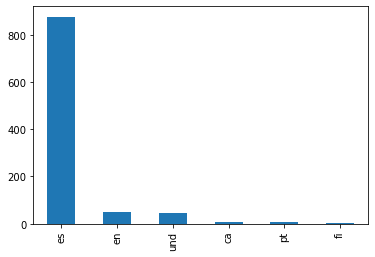

In [169]:
#Languages used in tweets
df_all_no_duplicates['lang'].value_counts().plot.bar()

<AxesSubplot:>

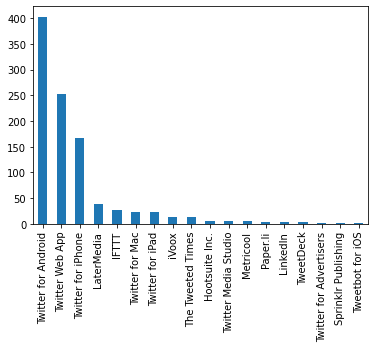

In [168]:
#Apps used to send the tweets 
df_all_no_duplicates['source'].value_counts().plot.bar()

<AxesSubplot:>

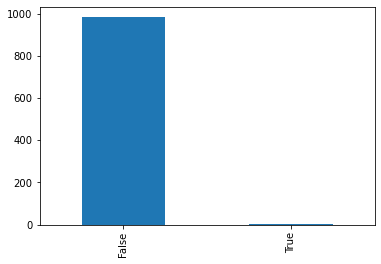

In [172]:
#Number of sensitive tweets(possibly_sensitive)
number_sensitive = df_all_no_duplicates['possibly_sensitive'].value_counts()
df_all_no_duplicates['possibly_sensitive'].value_counts().plot.bar()


In [183]:
#Here we see there is just one "sensitive" tweet
number_sensitive

#It would be nice to display the sensitive tweet
#df_all_no_duplicates[df_all_no_duplicates['possibly_sensitive'].isin["True"]]
#np.where(df_all_no_duplicates['possibly_sensitive'],'TRUE')

ValueError: either both or neither of x and y should be given

In [177]:
#Number of tweets open to whole Twitter(reply_settings)
df_all_no_duplicates['reply_settings'].value_counts()

everyone     980
following      5
Name: reply_settings, dtype: int64

<AxesSubplot:>

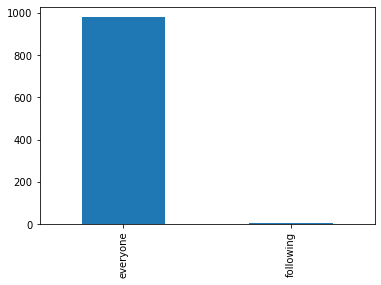

In [178]:
df_all_no_duplicates['reply_settings'].value_counts().plot.bar()

In [ ]:
#Data export
df_all.to_csv("table_2205.csv", encoding="utf-8")